In [1]:
import numpy as np
import pandas as pd

In [2]:
cp = pd.read_csv('carprices.csv')

In [3]:
cp.head()

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


In [5]:
dummies = pd.get_dummies(cp['Car Model'])

In [7]:
merged = pd.concat([cp, dummies], axis='columns')

In [8]:
merged

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [10]:
final = merged.drop(['Car Model','Mercedez Benz C class'], axis='columns')

In [11]:
final

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
model = LinearRegression()

In [15]:
final.columns 

Index(['Mileage', 'Sell Price($)', 'Age(yrs)', 'Audi A5', 'BMW X5'], dtype='object')

In [17]:
X = final[['Mileage', 'Age(yrs)', 'Audi A5', 'BMW X5']]

In [18]:
X

,Mileage,Age(yrs),Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [19]:
y = final['Sell Price($)']

In [20]:
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [21]:
model.fit(X, y)

LinearRegression()

In [23]:
model.predict([[45000, 4, 0, 0]])

array([36991.31721061])

In [24]:
model.predict([[86000, 7, 0, 1]])

array([11080.74313219])

In [27]:
model.score(X, y)

0.9417050937281083

In [28]:
# Using One Hot Encoding

In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
le = LabelEncoder()

In [59]:
cple = cp

In [60]:
cple

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [66]:
cple['Car Model'] = le.fit_transform(cp['Car Model'])
cple

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [75]:
X = cple[['Car Model', 'Mileage', 'Age(yrs)']]
X

,Car Model,Mileage,Age(yrs)
0,1,69000,6
1,1,35000,3
2,1,57000,5
3,1,22500,2
4,1,46000,4
5,0,59000,5
6,0,52000,5
7,0,72000,6
8,0,91000,8
9,2,67000,6


In [69]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [77]:
ct = ColumnTransformer([('Car Model', OneHotEncoder(), [0])], remainder='passthrough')
X = ct.fit_transform(X)

In [79]:
X

array([[0.00e+00, 1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [80]:
X = X[:, 1:]

In [81]:
X

array([[1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [82]:
y = cple['Sell Price($)']

In [83]:
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [84]:
model.fit(X, y)

LinearRegression()

In [85]:
model.predict([[0, 1, 45000, 4]])

array([36991.31721062])

In [86]:
model.predict([[1, 0, 86000, 7]])

array([11080.74313219])

In [88]:
model.score(X, y)

0.9417050937281083

In [91]:
import matplotlib.pyplot as plt

In [93]:
%matplotlib inline

In [94]:
cp

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


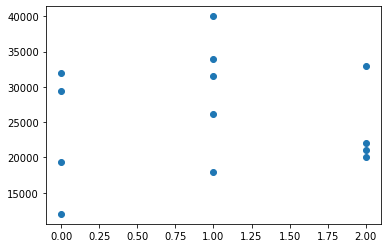

In [95]:
plt.scatter(cp['Car Model'], cp['Sell Price($)'])

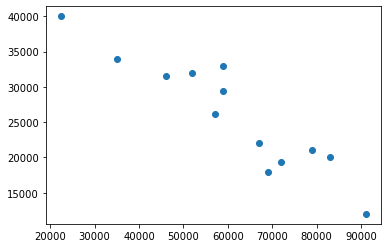

In [96]:
plt.scatter(cp['Mileage'], cp['Sell Price($)'])

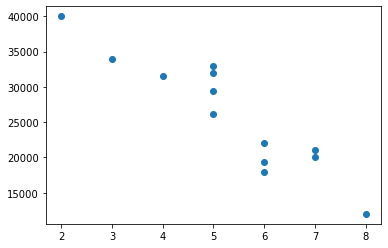

In [97]:
plt.scatter(cp['Age(yrs)'], cp['Sell Price($)'])